## Exemplo iris - 3.2

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Carrega a base de dados iris
iris = datasets.load_iris()
X = iris.data  # características
y = iris.target  # rótulos

# Conversão para classificação binária
y = (y == 0).astype(int)

# Divisão da base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calc_custo(X, y, pesos):
    m = X.shape[0]
    y_pred = sigmoid(np.dot(X, pesos))
    custo = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return custo

def gradiente_descendente(X, y, pesos, learning_rate, iteracoes):
    m = X.shape[0]
    for i in range(iteracoes):
        y_pred = sigmoid(np.dot(X, pesos))
        gradiente = np.dot(X.T, (y_pred - y)) / m
        pesos -= learning_rate * gradiente
        custo = calc_custo(X, y, pesos)
    return pesos

# Inicializando pesos
pesos_inicial = np.zeros(X_train.shape[1])

# Velocidade de aprendizado e numero de iterações
learning_rate = 0.1
iteracoes = 1000

# Treinamento do modelo
pesos_final = gradiente_descendente(X_train, y_train, pesos_inicial, learning_rate, iteracoes)

In [3]:
def predicao(X, weights):
    # Calcula as probabilidades com a função sigmoide
    prob = sigmoid(np.dot(X, weights))
    # Converte as probabilidades para as classes (0 ou 1)
    return [1 if i > 0.5 else 0 for i in prob]

# Realiza as predicoes na base de teste
y_pred = predicao(X_test, pesos_final)

# Calcula acurácia
acuracia = np.mean(y_pred == y_test)
print(acuracia)

1.0


In [4]:
import matplotlib.pyplot as plt

In [5]:
# Inicialização: escolher 3 pontos aleatoriamente como centroides iniciais
np.random.seed(42)  # para reprodutibilidade
k = 3
n_samples, n_features = X.shape
centroids = X[np.random.choice(n_samples, k, replace=False)]

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

# K-means
for _ in range(100):  # número máximo de iterações
    # Atribuição: encontrar o centroide mais próximo para cada ponto de dado
    distances = np.array([euclidean_distance(X, centroid) for centroid in centroids])
    closest_cluster = np.argmin(distances, axis=0)
    # Atualização: recalcular os centroides
    new_centroids = np.array([X[closest_cluster == k].mean(axis=0) for k in range(k)])
    # Verificar convergência
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [6]:
colors = ['r', 'g', 'b']

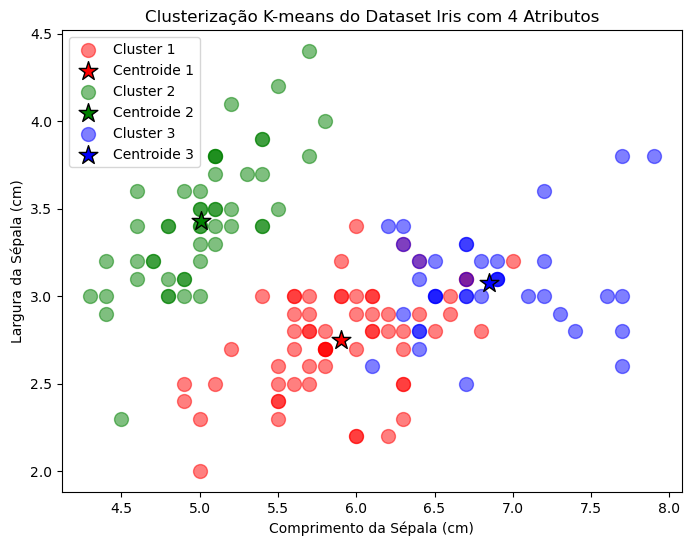

In [7]:

# Plot para as primeiras duas características
plt.figure(figsize=(8, 6))
for i in range(k):
    points = X[closest_cluster == i]
    plt.scatter(points[:, 0], points[:, 1], s=100, color=colors[i], alpha=0.5, label=f'Cluster {i+1}')
    plt.scatter(centroids[i, 0], centroids[i, 1], s=200, color=colors[i], edgecolors='k', marker='*', label=f'Centroide {i+1}')

plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.title('Clusterização K-means do Dataset Iris com 4 Atributos')
plt.legend()
plt.show()

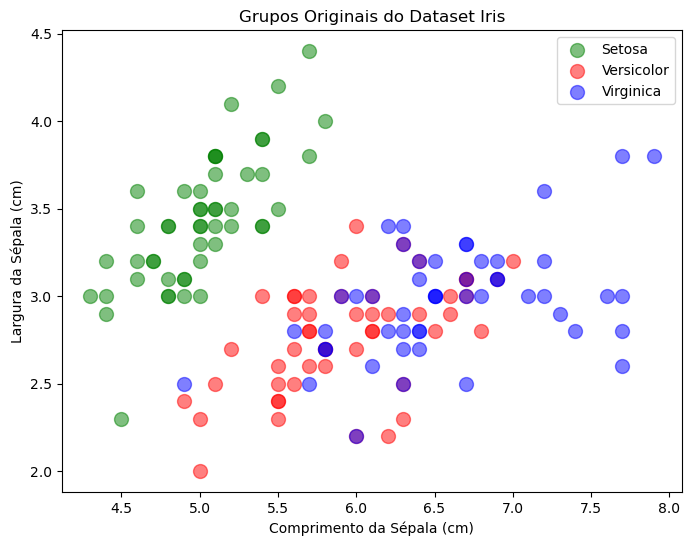

In [8]:
# Plot dos grupos originais do dataset Iris
plt.figure(figsize=(8, 6))

# As etiquetas originais do dataset Iris para cada amostra
y = iris.target

# Mapeamento de cores para os grupos originais
colors = ['g', 'r', 'b']
labels = ['Setosa', 'Versicolor', 'Virginica']

for i in range(3):  # Há 3 classes no dataset Iris
    points = X[y == i]
    plt.scatter(points[:, 0], points[:, 1], s=100, color=colors[i], alpha=0.5, label=labels[i])

plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.title('Grupos Originais do Dataset Iris')
plt.legend()
plt.show()